In [87]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [88]:
data = pd.read_csv("fake_or_real_news.csv")

In [89]:
data

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [90]:
data['fake'] = data['label'].apply(lambda x: 0 if x == "REAL" else 1)
data = data.drop("label", axis=1)

In [91]:
X, y = data["text"], data["fake"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

TF-IDF: Term Frequency - Inverse Document Frequency

A metric that indicates how important a word is to a document in a collection. It weighs the improtance of each word in a document based on how often it appears in that document and how often it appears accross all documents in the collection.

TF: Number of times a term t appears in a document
IDF: Logarithm of total number of documents divided by no. of docs that contain term
TF-IDF: TF * IDF

Basically allows us to find the most relevant and distinctive words per document.

In [92]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [93]:
clf = LinearSVC()  # Linear SVC is considered one of the best text classification algorithms
clf.fit(X_train_vectorized, y_train)

LinearSVC()

In [94]:
clf.score(X_test_vectorized, y_test)

0.9408050513022889

In [95]:
article_text = X_test.iloc[10]
vectorized_text = vectorizer.transform([article_text])

In [96]:
clf.predict(vectorized_text)

array([0], dtype=int64)

In [97]:
y_test.iloc[10]

0

In [98]:
# Generate a random index within the range of X_test
random_index = random.randint(0, len(X_test) - 1)

# Select a random article using the generated index
article_text = X_test.iloc[random_index]
vectorized_text = vectorizer.transform([article_text])

# Predict
predicted_value = clf.predict(vectorized_text)[0]

# Actual value
actual_value = y_test.iloc[random_index]

# Comparison and output
if predicted_value == actual_value:
    print("The answer is correct.")
else:
    print("The answer is incorrect.")



The answer is correct.


In [99]:
# Predict for the entire test set
predictions = clf.predict(X_test_vectorized)

# Convert predictions and actual labels to arrays for easier comparison
predictions_array = np.array(predictions)
actual_labels_array = y_test.to_numpy()

# Find indices where predictions and actual labels differ
mismatch_indices = np.where(predictions_array != actual_labels_array)[0]

# Print first 2 mismatches with its index
for index in mismatch_indices[:2]:
    print(f"Index: {index}, Predicted: {predictions_array[index]}, Actual: {actual_labels_array[index]}")
    print(f"Text: {X_test.iloc[index]}\n")


Index: 15, Predicted: 0, Actual: 1
Text: Sharpton Attacks O’Keefe, So O’Keefe Releases Brutal Expose on Sharpton… BOOM! 
If you are going to wallow in the liberal media mire, though, MSNBC is by far my favorite — and trust me, a year-and-a-half of observing presidential campaigns has made me quite a connoisseur of the left-slanting morass. 
MSNBC pretends that conservatives and Trump supporters are from another planet — or, at the very least, another culture, a sort of cargo cult that is to be studied anthropologically but never taken with any seriousness. 
This interaction with MSNBC reporter Jacob Rascon on Wednesday proved what I’m talking about perfectly. He had found a mother and daughter in line, apparently for early voting. They were also African-American, which made them a cargo cult on top of a cargo cult, by liberal media standards.   
However, when he asked them about criticism of Trump’s African-American outreach, the mother and daughter blew him out of the water. 
“Well, I

In [100]:
# Predict for the entire test set
predictions = clf.predict(X_test_vectorized)

# Convert predictions and actual labels to arrays for easier comparison
predictions_array = np.array(predictions)
actual_labels_array = y_test.to_numpy()

# Initialize lists for false negatives and false positives
false_negatives = []
false_positives = []

# Iterate over the predictions and actual labels
for i in range(len(predictions_array)):
    if predictions_array[i] == 0 and actual_labels_array[i] == 1:
        # False Negative
        false_negatives.append(i)
    elif predictions_array[i] == 1 and actual_labels_array[i] == 0:
        # False Positive
        false_positives.append(i)

In [101]:
# Print False Negatives
print("False Negatives: ACTUALLY FAKE NEWS!!!")
print()
print()
# First 2 False Negatives
for index in false_negatives[:2]:
    print(f"Index: {index}, Text: {X_test.iloc[index]}")
    print()


False Negatives: ACTUALLY FAKE NEWS!!!


Index: 15, Text: Sharpton Attacks O’Keefe, So O’Keefe Releases Brutal Expose on Sharpton… BOOM! 
If you are going to wallow in the liberal media mire, though, MSNBC is by far my favorite — and trust me, a year-and-a-half of observing presidential campaigns has made me quite a connoisseur of the left-slanting morass. 
MSNBC pretends that conservatives and Trump supporters are from another planet — or, at the very least, another culture, a sort of cargo cult that is to be studied anthropologically but never taken with any seriousness. 
This interaction with MSNBC reporter Jacob Rascon on Wednesday proved what I’m talking about perfectly. He had found a mother and daughter in line, apparently for early voting. They were also African-American, which made them a cargo cult on top of a cargo cult, by liberal media standards.   
However, when he asked them about criticism of Trump’s African-American outreach, the mother and daughter blew him out of the

In [102]:
# Print False Positives
print("\nFalse Positives: ACTUALLY REAL NEWS!!!")
print()
print()
# First 2 False Positives
for index in false_positives[:2]:
    print(f"Index: {index}, Text: {X_test.iloc[index]}")
    print()



False Positives: ACTUALLY REAL NEWS!!!


Index: 44, Text: As volatile and nerve-wracking as the great Clinton-Trump Slugfest of 2016 has appeared from the outside, polling data have, for months, suggested a far more stable race. Polling aggregators and election prediction markets have consistently shown Hillary Clinton with an enduring lead over Donald Trump. Then, with less than two weeks remaining until Election Day, F.B.I. director James Comey decided to get involved, firing off a maddeningly vague letter to Congress, alerting them to the renewal of an investigation into new e-mails that may or may not pertain to Clinton’s use of a private server as secretary of state, and throwing the race into chaos. The Mexican peso plunged as Wall Street started pricing in the rising possibility of a Trump win, and the media went into overdrive, hyperventilating over a spate of new polls that showed the race tightening. Now, as we head into the final weekend before America’s much-anticipated da

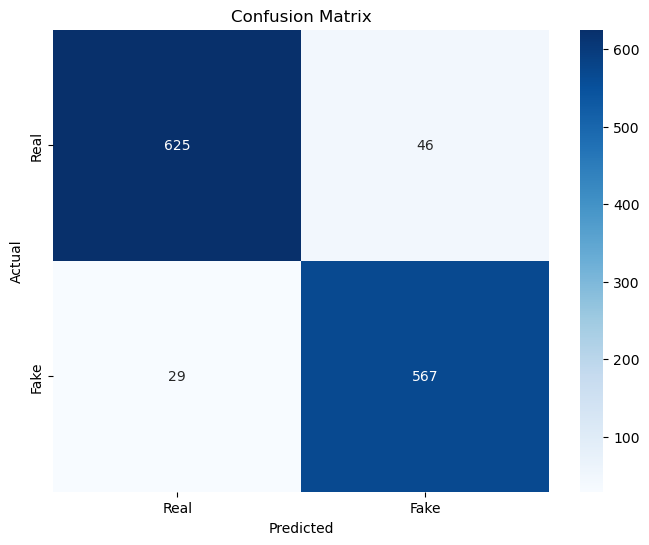

In [103]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
